In [44]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'dataseta:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4440556%2F7623069%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240214%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240214T092625Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3cf1778ef2d7073e4b592176f12da380c4998a92188dfa260cd3c59baf2d77648d96e1698f7367aeceef159544d6dc737086f16b12b63d740b8a14e1f68b8e3a906c5298bd5de1cb3c266a4c0ed9bb81ace3ed416a4e7f4d0349f8b5abc6851d014436c281b2d2e3cb0f240d9944d4f6079294d73ea3c080a79dbfd9fbf09693c343aff08f84b297ea68a9f6ea045ed8e65b820b4179b11943b0e552f255a8e1742cc266bf034aee38ef6dda8a05e221d22fcc541324d837b22bf2087d7a8f071943c125857c78a088aa784c7c0ffd92d8e02e6385f9d0eaef71a0beb76daec6171eab64a0b7dea63466738e1aaf82b17ac8eaff0a7137a75052ca25ba5ee3dc'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)


#

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


The system cannot find the path specified.


[==================================================] 43729191 bytes downloaded
Downloaded and uncompressed: dataseta
Data source import complete.


In [45]:
%pip install matplotlib
%pip install seaborn
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Admin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Users\Admin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Admin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [47]:
mg_train = pd.read_csv("/kaggle/input/dataseta/train_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'],engine='python')
mg_test = pd.read_csv("/kaggle/input/dataseta/test_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'],engine='python')
mg_test_sol = pd.read_csv("/kaggle/input/dataseta/test_data_solution.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'],engine='python')

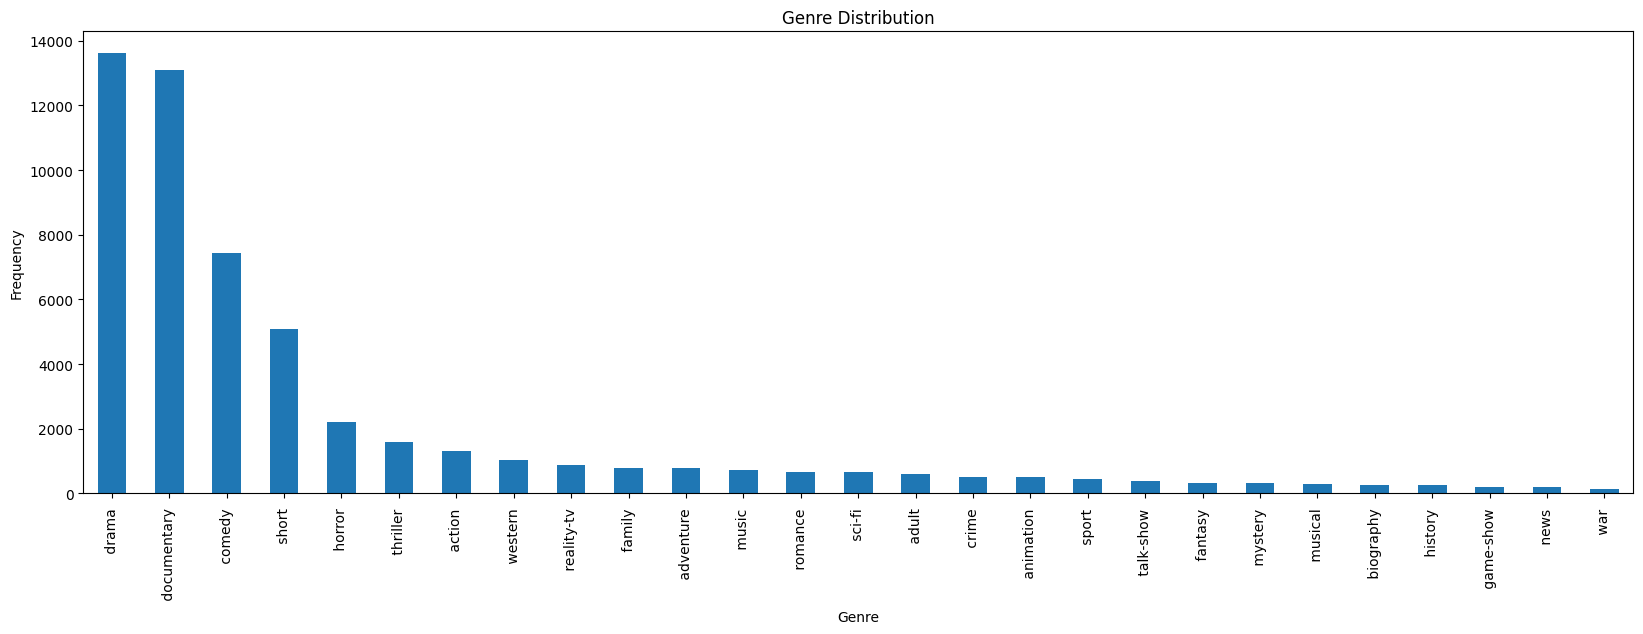

In [48]:
gen_counts = mg_train['GENRE'].value_counts()
plt.figure(figsize=(20,6))
gen_counts.plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()

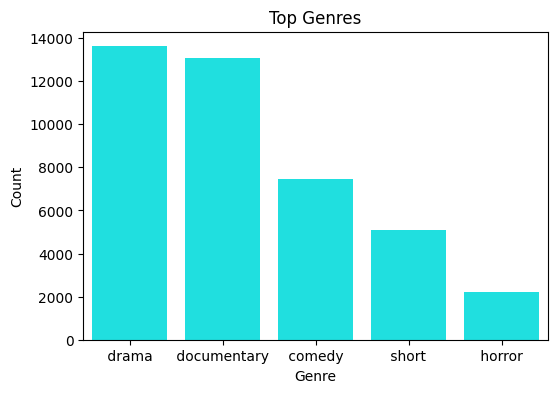

In [49]:
top_gen = mg_train['GENRE'].value_counts().nlargest(5).index
top_gen_df = mg_train[mg_train['GENRE'].isin(top_gen)]
plt.figure(figsize=(6,4))
sns.countplot(data=top_gen_df, x='GENRE', order=top_gen,color='cyan')
plt.title('Top Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

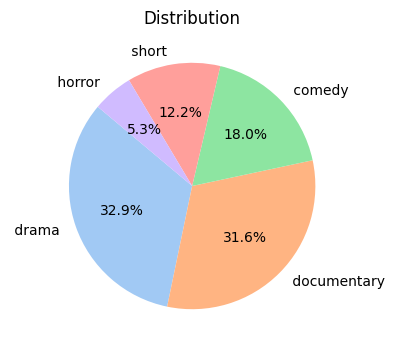

In [50]:
gen_counts = mg_train['GENRE'].value_counts().nlargest(5)
col = sns.color_palette('pastel')[0:len(gen_counts)]
plt.figure(figsize=(4,4))
plt.pie(gen_counts, labels=gen_counts.index, autopct='%1.1f%%', startangle=140, colors=col)
plt.title('Distribution')
plt.show()

In [51]:
tf = TfidfVectorizer(max_features=1000)
x_tr = tf.fit_transform(mg_train['DESCRIPTION'])
label_encoder = LabelEncoder()
y_tr = label_encoder.fit_transform(mg_train['GENRE'])
y_ts = label_encoder.fit_transform(mg_test_sol['GENRE'])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x_tr, y_tr, test_size=0.2, random_state=42)

In [53]:
lr_mod = LogisticRegression(max_iter=1000)
lr_mod.fit(X_train, y_train)
lr_pred = lr_mod.predict(X_test)
y_test_gen = label_encoder.inverse_transform(y_test)
y_pred_gen = label_encoder.inverse_transform(lr_pred)
from sklearn.metrics import classification_report
print(classification_report(y_test_gen, y_pred_gen, zero_division=1))

               precision    recall  f1-score   support

      action        0.37      0.17      0.24       263
       adult        0.65      0.18      0.28       112
   adventure        0.36      0.09      0.14       139
   animation        0.45      0.05      0.09       104
   biography        1.00      0.00      0.00        61
      comedy        0.47      0.52      0.49      1443
       crime        0.25      0.03      0.05       107
 documentary        0.65      0.84      0.74      2659
       drama        0.53      0.75      0.62      2697
      family        0.35      0.09      0.14       150
     fantasy        1.00      0.00      0.00        74
   game-show        0.85      0.28      0.42        40
     history        1.00      0.00      0.00        45
      horror        0.55      0.50      0.52       431
       music        0.57      0.42      0.48       144
     musical        1.00      0.04      0.08        50
     mystery        0.50      0.02      0.03        56
        n

In [54]:
sv_mod = LinearSVC()
sv_mod.fit(X_train, y_train)
sv_pred = sv_mod.predict(X_test)

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [55]:
y_test_gen = label_encoder.inverse_transform(y_test)
y_pred_gen = label_encoder.inverse_transform(sv_pred)
print(classification_report(y_test_gen, y_pred_gen, zero_division=1))

               precision    recall  f1-score   support

      action        0.32      0.16      0.21       263
       adult        0.55      0.31      0.40       112
   adventure        0.30      0.08      0.12       139
   animation        0.26      0.07      0.11       104
   biography        1.00      0.00      0.00        61
      comedy        0.47      0.49      0.48      1443
       crime        0.27      0.06      0.09       107
 documentary        0.65      0.85      0.74      2659
       drama        0.54      0.73      0.62      2697
      family        0.33      0.10      0.15       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.64      0.45      0.53        40
     history        1.00      0.00      0.00        45
      horror        0.50      0.55      0.52       431
       music        0.52      0.47      0.49       144
     musical        0.33      0.06      0.10        50
     mystery        0.33      0.07      0.12        56
        n

In [56]:
nb_mod = MultinomialNB()
nb_mod.fit(X_train, y_train)

MultinomialNB()

In [57]:
nb_pred = nb_mod.predict(X_test)

In [58]:
y_test_gen = label_encoder.inverse_transform(y_test)
y_pred_gen = label_encoder.inverse_transform(nb_pred)
print(classification_report(y_test_gen, y_pred_gen, zero_division=1))

               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        1.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        1.00      0.00      0.00       104
   biography        1.00      0.00      0.00        61
      comedy        0.50      0.26      0.34      1443
       crime        1.00      0.00      0.00       107
 documentary        0.53      0.89      0.66      2659
       drama        0.41      0.83      0.55      2697
      family        0.00      0.00      0.00       150
     fantasy        1.00      0.00      0.00        74
   game-show        1.00      0.05      0.10        40
     history        1.00      0.00      0.00        45
      horror        0.80      0.09      0.16       431
       music        0.75      0.04      0.08       144
     musical        1.00      0.00      0.00        50
     mystery        1.00      0.00      0.00        56
        n

In [59]:
lr_acc = accuracy_score(y_test, lr_pred)
sv_acc = accuracy_score(y_test, sv_pred)
nb_acc = accuracy_score(y_test, nb_pred)

In [60]:
print("Logistic Regression Accuracy:", lr_acc)
print("SVM Accuracy:", sv_acc)
print("Naive Bayes Accuracy:", nb_acc)

Logistic Regression Accuracy: 0.5515078852716038
SVM Accuracy: 0.548279996310984
Naive Bayes Accuracy: 0.4731162962279812


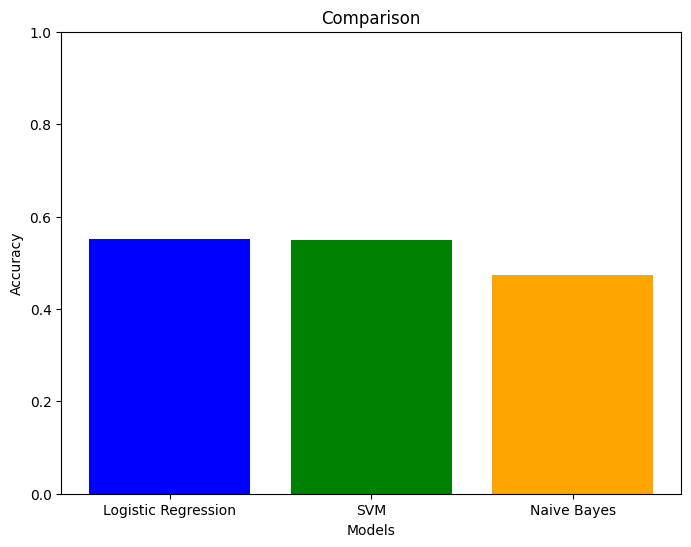

In [61]:
acc = [lr_acc, sv_acc, nb_acc]
mod = ['Logistic Regression', 'SVM', 'Naive Bayes']
plt.figure(figsize=(8, 6))
plt.bar(mod, acc, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison')
plt.show()

In [62]:
%pip install joblib
%pip install flask

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Admin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Admin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [75]:
from flask import Flask, request, jsonify
import joblib

# Initialize Flask application
app = Flask(__name__)



# Prediction function
def predict(desc):
    vec = tf.transform([desc])
    pred = lr_mod.predict(vec)
    return label_encoder.inverse_transform(pred)[0]

# Route for prediction
@app.route('/predict', methods=['GET', 'POST'])
def predict_genre():
    if request.method == 'POST':
        description = request.form['description']
    elif request.method == 'GET':
        description = request.args.get('description', '')
    else:
        return jsonify({'error': 'Method Not Allowed'}), 405

    prediction = predict(description)
    return jsonify({'predict': prediction})

# Run the Flask app
if __name__ == '__main__':
    app.run(host='0.0.0.0' ,debug=False, port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.9.61:5000
Press CTRL+C to quit
192.168.9.61 - - [15/Feb/2024 17:18:37] "GET / HTTP/1.1" 404 -
192.168.9.61 - - [15/Feb/2024 17:18:37] "GET /favicon.ico HTTP/1.1" 404 -
192.168.9.61 - - [15/Feb/2024 17:18:42] "GET /predict HTTP/1.1" 200 -
192.168.9.61 - - [15/Feb/2024 17:18:52] "GET /predict?description=hello HTTP/1.1" 200 -
192.168.9.61 - - [15/Feb/2024 17:19:20] "POST /predict?description=hello HTTP/1.1" 400 -
192.168.9.61 - - [15/Feb/2024 17:20:41] "GET /predict?description=hello HTTP/1.1" 200 -
192.168.9.61 - - [15/Feb/2024 17:21:18] "GET /predict?description=two HTTP/1.1" 200 -
192.168.9.61 - - [15/Feb/2024 17:21:24] "GET /predict?description=two+boy HTTP/1.1" 200 -
192.168.9.61 - - [15/Feb/2024 17:21:50] "GET /predict?description=theri+boys+went+to+the+trip.they+commited+sucide HTTP/1.1" 200 -
192.168.9.61 - - [15/Feb/2024 17:32:28] "GET /predict?description= HTTP/1.1" 200 -
192.